<center> <h2> DS 3000 - Summer 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>Predicting COVID-19 Case Count in the United States</h3> </center>
<center><h4>Max Breslauer-Friedman and Luca Demian</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

In this project we used data about COVID-19 risk factors to predict case count at a set period of time since the first case in each county we have data on. We collected data from a wide variety of different sources and compiled it into one data set from which we can train our predictive models. We obtained case counts for each county at 60, 70, and 80 days, and compared prediction accuracy between these three levels. We processed the data we collected by scaling it, creating new features, and selecting the best features for prediction. After analyzing our data using different visualizations, we trained 6 different algorithms multiple times each under different conditions, and selected the best 3 on which we performed hyperparameter tuning and final testing. We found that the best algorithm for predicting case count based on our features was Ridge regression, but the difference between Ridge, Lasso, and Linear Regression was negligable. Ultimately we also found that the best length of time to train our models on was 80 days since the first case, with significantly better predictions than when looking at 60 days.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

Our project is focused on the COVID-19 outbreak in the United States, specifically on a county level. The goal of the project is to predict COVID-19 case count based on risk factor data available prior to the outbreak. This is an important goal because the results of this analysis can be extended to help other efforts to predict the severity of this or future outbreaks, and to analyze what could've been done before this pandemic in preparation. Our dataset contains information about almost every county in the United States with its total case count at 60, 70, and 80 days since the first case appeared, as well as demographic data and infrastructure data.


Problem Statement

For our project, we will use data on different factors that contributed to the spread of COVID-19 in the US to predict the severity of the outbreak based on case count. We will look at these factors in as many different locations as possible (at the county level) in order to get a varied look across the country. We want to learn more about how these factors can be used to predict how bad the pandemic is in different locations, and what could’ve been done ahead of time to potentially lessen the drastic negative consequences of the COVID-19 outbreak. We will remove the variable of time by looking at the same point of the outbreak across all counties when training our models, as measured by days since the first case, to control for the way it appeared in different regions in a non-uniform way. We will predict case counts at three different levels for the number of days since the first case (60, 70, and 80 days) and analyze how prediction accuracy differs between them.


Significance of the Problem

Given the severity of the virus, solving the problems addressed in the problem statement will hopefully tell us more about what could’ve been done ahead of time in anticipation of a pandemic. Additionally, if we can create a model to accurately  predict  the  severity the COVID-19  pandemic  based  on  prior  factors,  this  could potentially  be extended to forecasting the remainder of the outbreak or predicting other future outbreaks. We haven't found previous work using machine learning in a similar way towards COVID-19, likely because a pandemic of this scale hasn't happened since the inception of machine learning. We did find some work applying machine learning to disease outbreaks, but the models were all based on mostly unrelated variables to what we are analyzing, which is purely demographic data from before the outbreak began (all the work we found used data about the make up of a virus itself or live data).

Questions/Hypothesis
    
Based on our research about the virus and the impact it has had nationwide, we came up with the following research questions to answer:

1. How does changing the length of time since the first case appeared in a given county change the accuracy of the predictions from the model?
2. What feature is the most influential in predicting the spread of the virus?
3. Can the case count actually be predicted accurately based on any information, or is this virus too unpredictable?
4. Which features have little to no impact on the spread of the virus? 
5. If our model is accurate, will it be able to forecast the total case counts in the future, rather than just predicting already existing numbers?
6. Based on our data, we think LASSO regression will be the most accurate model, will this be true or will another model be more accurate?

**Hypotheses:**

Hypotheses about features:
- *Null*: All features will have an equal effect on the total number of cases.
- *Alternative*: Population density, population, and population aged over 65 will have the biggest effect on the total number of cases.
- *Alternative*: The commuting data as well as the education and economic data will have the smallest effect on the total number of cases.
- *Alternative*: The population of the county will have the largest effect on the total number of cases.


- *Null*: All features are independent and will unique effects on the prediction.
- *Alternative*: Many of the features will have similar effects on the data as they are correlated (i.e poverty and income, commuting in and commuting out).

Hypotheses about length of time since first case:
- *Null*: The accuracy of the model will not fluctuate that much when changing the length of time since the first case appeared in the county.
- *Alternative*: The model will vary in accuracy when predicting at different lengths of time since the first case appeared.

## 2. METHOD

### 2.1. Data Acquisition

We sourced our data from a variety of different datasets, visible in the table below. The code we used to consolidate this data is in our Github Repository [here](https://github.com/lucademian/ds3000_covid_prediction/tree/master/data), where there is a series of Jupyter notebooks prefixed by the order we ran them. The folder also contains the raw data and data midway through compiling into a single table. Our dataset includes 24 variables related to the demographics and preparedness of each county prior to the outbreak, as well as various case counts per county. These variables range from income and poverty data to the number of ICU beds in the county. We decided to focus on variables available before the pandemic started, rather than variables after the disease made an appearance, so that our results could theoretically be extended to forecasting future case counts of COVID-19 or be altered to predict future pandemics.

#### Data Sources

|Data Set|Source|Date|Notebook|Variables|
|-|-|-|-|-|
|NY Times|[Link](https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv)|May 22, 2020|[000_process_nytimes](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/000_process_nytimes.ipynb)|`date_0days`, `cases_0days`, `deaths_0days`, `date_60days`, `cases_60days`, `deaths_60days`, `fips`
|Kaiser Health|[Link](https://khn.org/news/as-coronavirus-spreads-widely-millions-of-older-americans-live-in-counties-with-no-icu-beds/#lookup)|March 30, 2020|[010_process_kaiser](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/010_process_kaiser.ipynb)|`icu_beds`, `kaiser_total_population`, `kaiser_60plus_population`
|US Census Commuting Data|[Link](https://www.census.gov/data/tables/2015/demo/metro-micro/commuting-flows-2015.html)|2015|[020_uscensus_commuting_flows](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/020_uscensus_commuting_flows.ipynb)|`commuting_within`, `commuting_out`, `commuting_in`
|US Census Population Density|[Link](https://api.census.gov/data/2019/pep/population?get=DENSITY,POP&for=county:*)|2019|[030_uscensus_population_density](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/030_uscensus_population_density.ipynb)|`density`, `pop_2019`
|Political Majority|[Link](https://github.com/tonmcg/US_County_Level_Election_Results_08-16/blob/master/2016_US_County_Level_Presidential_Results.csv)|2016|[040_political_majority](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/040_political_majority.ipynb)|`percent_democrat`, `percent_gop`
|Poverty Data|[Link](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)|Feb. 5, 2020|[050_process_poverty](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/050_process_poverty.ipynb)|`percent_in_poverty`
|Age Data|[Link](https://data.census.gov/cedsci/table?q=Older%20Population&hidePreview=true&t=Older%20Population&tid=ACSDP1Y2018.DP05&vintage=2018&g=0100000US.050000)|2018|[060_age_data](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/060_age_data.ipynb)|`pop_under18`, `pop_over65`, `pop_2018`, `median_age`
|Education Data|[Link](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)|2018|[070_education_data](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/070_education_data.ipynb)|`percent_with_bachelors`
|Income Data|[Link](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)|2018|[080_income_data](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/060_income_data.ipynb)|`median_income`

NOTE: we also got the counts from NY Times for other N day values.

### 2.2. Variables

- **IV**: The features used in prediction.
- **DV**: The most predictive feature(s).


- **IV**: The features used in the prediction.
- **DV**: How the effect of each feature on the predicted data is different or correlated with the effect of others.


- **IV**: The time since the first case appeared in each county.
- **DV**: The prediction accuracy of our model.

Our predictive model will predict the target variable of case count based on a number of different features, listed in the table below.

### 2.3. Data Analysis

Our predictive model will predict the case count in each county after X days, where X is the number of days since the first case was identified in the county. We plan to try running our model to predict case count at X=60, X=70, and X=80 days, and compare the perfomance between the three. It will predict case count using a number of feature variables, in the table below:

|Name|Description|
|-|-|
|`icu_beds`|Count of ICU beds per county.
|`commuting_in`|Population commuting into this county every day.
|`commuting_out`|Population commuting out of this county every day.
|`commuting_within`|Population commuting within this county every day.
|`commuting_ratio`|Population commuting out of this county every day divided by the population commuting within the county.
|`density`|A measure of poulation density in this county.
|`percent_democrat`|Percentage of 2016 voters voting Democratic.
|`percent_in_poverty`|Percentage of county population (all ages) in poverty.
|`pop_under18`|Population in county aged under 18.
|`pop_over65`|Population in county aged 65+.
|`median_age`|Median age for the county.
|`percent_with_bachelors`|Percent of people in county attaining a bachelors degree or higher.
|`median_income`|A measure of the median income in this county.
|`pop_2019`|County population as of 2019.

We chose these predictors based on [CDC guidance](https://www.cdc.gov/coronavirus/2019-ncov/covid-data/investigations-discovery/assessing-risk-factors.html) about risk factors for the infection on top of our own judgements about what factors could potentially lead to a worsened outbreak in a county. We hypothesize that population density, population, ICU beds, median income, and population aged 65+ will be the most important variables in our predictive model.

This is a supervised machine learning problem because we are using a subset of our data to train the model, where it will have access to the number of cases, the variable to predict, in order to learn. This is a regression problem, because we are predicting the case count, a continuous variable.

We are going to use the LASSO, Ridge, Support Vector Machine, and k-Nearest Neighbor regression algorithms because this is a regression problem and we want to test a variety of different models. We think LASSO regression will make most accurate predictions because we have more control over the tuning of the model and it will automatically select the most important features.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features

We performed data cleaning and wrangling as part of our data acquisition, because our data is coming from so many distinct sources. This selection process can be seen in our [notebook on Github](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/999_feature_selection.ipynb), and the final data with the features and target variable is selected below. We extracted a new feature from the existing commuting out and commuting within features, which is the ratio of people commuting out to people commuting within. This new feature is called `commuting_ratio`.

In [1]:
import pandas as pd
import requests

DATA_URL = "https://raw.githubusercontent.com/lucademian/ds3000_covid_prediction/master/data/999_selected_features_60-70-80days.csv?token=ADDEA5VGC2CO7OOZREVREFK65ZXY4"
df = pd.read_csv(DATA_URL, index_col=0)

df.insert(loc=0, column="commuting_ratio", value=df.commuting_out / df.commuting_within)

df.head()

,commuting_ratio,icu_beds,commuting_in,commuting_out,commuting_within,density,percent_democrat,percent_in_poverty,pop_under18,pop_over65,median_age,percent_with_bachelors,median_income,pop_2019,cases_60days,cases_70days,cases_80days,fips
0,0.559669,72,54070,130657,233454,393.996419,0.542634,7.5,180294,99868,37.8,31.9,87096,822083,446.0,1228.0,1801.0,53061
3,0.151523,1606,489235,317505,2095418,5450.384359,0.743758,13.8,1160425,724730,36.6,38.0,63347,5150233,1194.0,6473.0,15474.0,17031
6,0.189301,651,317959,235247,1242712,4005.616646,0.509602,10.5,711188,440488,37.8,39.9,89373,3175692,187.0,786.0,1299.0,6059
9,0.023281,1004,79525,40810,1752902,487.509549,0.456797,12.3,1042245,615277,36.1,32.0,65234,4485414,299.0,1326.0,2146.0,4013
12,0.080023,2126,483659,334665,4182123,2473.507350,0.714072,14.2,2246521,1299277,36.2,31.8,67986,10039107,1216.0,5940.0,10496.0,6037


First, we separated our features from the targets. We have 3 different target columns, for each of the different N-day values we will look at. We decided to use the Min-Max Scaler to standardize our data, because the scales for our data are so different. Our function below (`get_features_target`) applies this scaler and will remove NaN values for the features and target at the given number of days since the first case, because the more you increase the number of days the more NaN values there are.

In [2]:
from sklearn.preprocessing import MinMaxScaler

def get_features_target(n_days, k_best=None, scale=True):
    """
    This function takes in a N-day value and returns the features and target
    for that value as a tuple: (features, target). The features are scaled using
    the Min-Max scaler.
    """

    target_column = f"cases_{n_days}days"
    
    # our first 13 columns are features, and the 
    # last N columns are the different targets.
    features = df.loc[df[target_column].notna()].iloc[:, 0:14]
    target = df[target_column].dropna()

    if k_best is not None:
        # if the k_best are requested, use the k_best_features function to select the best features and filter
        selected_names = k_best_features(k_best, features, target)
        features = df.loc[df[target_column].notna(), selected_names]

    if not scale:
        return features, target
    
    # create a scaler object and fit to the features
    scaler = MinMaxScaler()
    scaler.fit(features)

    # transform the features using the scaler
    features_scaled = scaler.transform(features)
    
    return features_scaled, target

In [14]:
# sample output
get_features_target(60)

(array([[7.45615954e-02, 3.38664158e-02, 1.03824832e-01, ...,
         3.82947977e-01, 5.36631390e-01, 8.18194651e-02],
        [1.94702801e-02, 7.55409219e-01, 9.39719323e-01, ...,
         4.71098266e-01, 3.30112959e-01, 5.12980660e-01],
        [2.45695149e-02, 3.06208843e-01, 6.10720748e-01, ...,
         4.98554913e-01, 5.56431907e-01, 3.16281041e-01],
        ...,
        [2.54201705e-02, 0.00000000e+00, 2.76220808e-03, ...,
         1.61849711e-01, 1.96813830e-01, 4.28954659e-04],
        [7.26955803e-02, 0.00000000e+00, 7.03037661e-04, ...,
         1.67630058e-01, 1.88387523e-01, 7.89870295e-04],
        [6.31017161e-02, 0.00000000e+00, 3.15022340e-04, ...,
         1.80635838e-01, 1.87630982e-01, 2.04017450e-04]]),
 0        446.0
 3       1194.0
 6        187.0
 9        299.0
 12      1216.0
          ...  
 8268       2.0
 8271       1.0
 8274      15.0
 8277       9.0
 8280       5.0
 Name: cases_60days, Length: 2710, dtype: float64)

Then, we performed feature selection using the SelectKBest algorithm based on F-value
for each feature.

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

def k_best_features(k, features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
  
    selector = SelectKBest(f_regression, k = k)
    selector.fit(X_train, y_train)

    selected = selector.get_support()
  
    columns = []
    for i in range(len(selected)):
      if selected[i]:
        columns.append(df.columns[i])

    return columns

In [7]:
print(k_best_features(5, *get_features_target(70)))

['commuting_in', 'commuting_out', 'density', 'pop_over65', 'pop_2019']


This shows us that the 5 most important features in our prediction will be: `commuting_in`, `commuting_out`, `density`, `pop_over65`, `pop_2019`

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook)


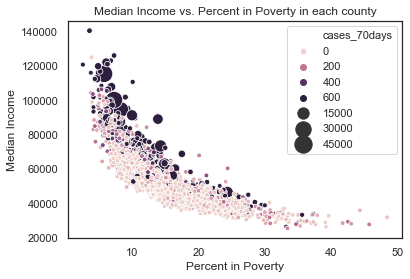

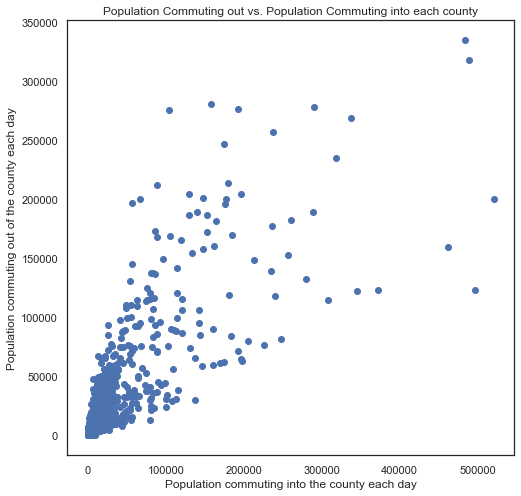

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot

sns.set(style="white")
avg_cases = sum(df["cases_70days"].dropna())/len(df["cases_70days"].dropna())
sns.scatterplot(data = df, x = 'percent_in_poverty', y = 'median_income', size='cases_70days', sizes=(20, 300), hue = 'cases_70days', hue_norm = (0, avg_cases))
plt.xlabel("Percent in Poverty")
plt.ylabel("Median Income")
plt.title("Median Income vs. Percent in Poverty in each county")

plt.figure(figsize = (8,8))
plt.scatter(x=df['commuting_in'], y=df['commuting_out'])
plt.xlabel("Population commuting into the county each day")
plt.ylabel("Population commuting out of the county each day")
plt.title("Population Commuting out vs. Population Commuting into each county")
plt.show()

For our first visualization, we decided to see if a visualization could help support our hypothesis. In one hypothesis we predicted that a few of the features would have similar effects on the target variable as the data between them was directly correlated. We first visualized the percent of the population in poverty and the median income. As you can see, there is a distinct correlation between the two variables. We also visualized the data for the number of people commuting into the county versus the number of people commuting out of the county each day. Based on the plot, we can see that there is a positive correlation between the two features, and while it is not an extremely strong correlation, it is close enough to believe that the two features will have relatively similar effects on the target variable. 

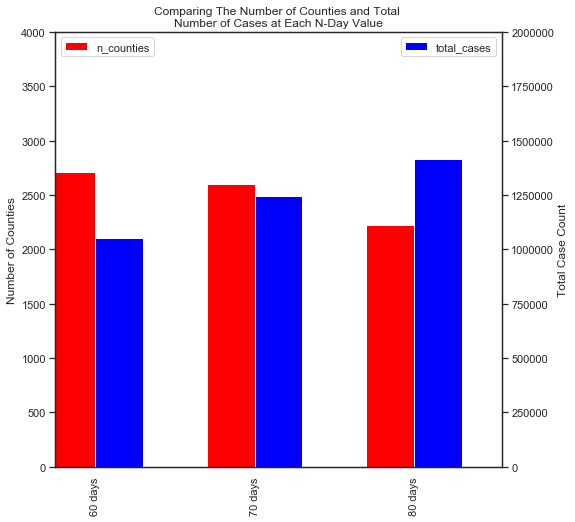

In [36]:
import numpy as np
day_counts = (60, 70, 80)

df_rows = [{
  "n_counties": len(get_features_target(N, scale=False)[0]),
  "total_cases": get_features_target(N, scale=False)[1].sum()
} for N in day_counts]

bar_df = pd.DataFrame(df_rows, index=day_counts)

fig = plt.figure(figsize = (8,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

ax.set_ylim(top = 4000)
ax2.set_ylim(top = 2000000)

bar_df.n_counties.plot(kind='bar', color='red', ax=ax, width=width, position=1, align='center')
bar_df.total_cases.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, align='center')

ax.set_ylabel('Number of Counties')
ax2.set_ylabel('Total Case Count')

# Create names on the x-axis
y_pos = range(3)
plt.xticks(y_pos, [f"{N} days" for N in day_counts])

plt.title("Comparing The Number of Counties and Total \nNumber of Cases at Each N-Day Value")

ax.legend(loc=2)
ax2.legend(loc=0)

# Show graphic
plt.show()

There is an inverse relationship between the number of counties and the number of days since the first case appeared. This tells us a few things about the virus as well as our to-be model. Seen in the plot, as the number of counties decrease, the number of cases increase, showing that there are some counties that have had cases for longer and therefore have more cases, that balance out the effect of looking at fewer counties. This plot also leads us to believe that the model trained on sixty days worth of data will be more accurate in predicting the case counts, than the models trained on the longer time frames. This is due to the fact that in the longer time frame, there are less data samples to train the model with.

In [80]:
import plotly.figure_factory as ff

temp_df = df.dropna()

fips = temp_df["fips"]

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

def draw_map(feature_name, binning_endpoints):
    values = temp_df[feature_name]
    fig = ff.create_choropleth(fips=fips, values=values, binning_endpoints=binning_endpoints,
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.25}, round_legend_values=True, colorscale=colorscale)
    fig.layout.template = None
    fig.show()

ModuleNotFoundError: No module named 'plotly'

In [81]:
draw_map("density", [50, 150, 300, 500, 1000])
draw_map("cases_60days", [300, 500, 1000, 3000, 7000])
draw_map("icu_beds", [10, 30, 60, 100, 200])

NameError: name 'draw_map' is not defined

These three choropleth maps show how the data can be represented visually on the county level, across the entire country. Here we have visualized the population density, number of icu beds, and the number of cases after 60 days, for all the sample data points in the dataset. The same color scheme is used on all three maps to show how the data is correlated. As the value of the datapoint increase, the color becomes increasingly more purple. As seen, in a majority of counties where there is purple for cases, there is also purple for population density and icu beds. This implies not only the strong impact these two features have on the target, but that they are related as well. This makes sense because all 3 variables are dependent in some way on population. The noteable areas to look at for this correlation are parts of the Northeast (i.e NY, NJ, PA, MA) as well as Florida and California.

### 3.3. Model Construction

To test our hypothesis about which number of days since the first case will yield the best accuracy, we generated a dataframe where we fit a linear regression model to data at each n-day level 15 times, to get multiple trials, and recorded the r^2 score for each trial.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_rows = []

for n in (60, 70, 80):
    features, target = get_features_target(n)
    for i in range(15):
        X_train, X_test, y_train, y_test = train_test_split(features, target)
        estimator = LinearRegression()
        estimator.fit(X_train, y_train)
        data_rows.append({
            "days": n,
            "score": estimator.score(X_test, y_test)
        })

test_df = pd.DataFrame(data_rows)
test_df[::5]

,days,score
0,60,0.385765
5,60,0.233484
10,60,0.442076
15,70,0.488816
20,70,0.266132
25,70,0.467764
30,80,0.423503
35,80,0.594136
40,80,0.525709


Below are the descriptive statistics for this data we generated

In [38]:
test_df.groupby(by="days").agg(["count", "mean", "std", "sem"]).loc[:, "score"]

,count,mean,std,sem
days,,,,
60,15,0.173141,0.355738,0.091851
70,15,0.418252,0.118922,0.030706
80,15,0.469503,0.093613,0.024171


This function allows us to conduct a oneway ANOVA test easily, by providing the data from above and the independent variable/dependent variable.

In [9]:
import scipy.stats as stats
from statsmodels.stats.multicomp import MultiComparison

def oneway_ANOVA(data, IV, DV):
   print("----------------------")
   print("ONE-WAY ANOVA RESULTS")
   print("----------------------")
   
   print("\nF-test")
   print("--------")

   group_names = data[IV].unique()
   groups = [data[data[IV] == group_name][DV] for group_name in group_names]

   fstat, pvalue = stats.f_oneway(*groups)

   dof1 = len(groups) - 1
   dof2 = sum([(len(group) - 1) for group in groups])

   print(f"F({dof1}, {dof2}) = {fstat:.3}, p = {pvalue:.1}\n\n")

   print("Asumption Checks")
   print("-----------------")
   print("Assumption of Equality of Variances:")
   
   lstat, lpval = stats.levene(*groups)
   print(f"\tLeveneResult(statistic={lstat}, pvalue={lpval})")
   
   if lpval > 0.05:
      print("\tAssumption is met. p > 0.05")
   else:
      print("\tAssumption is not met. p < 0.05")
      
   print("\nAssumption of Normality:")
   
   for index, group in enumerate(groups):
      group_name = group_names[index]
      shapiro_f, shapiro_p = stats.shapiro(group)
      print(f"\t{group_name} : ({shapiro_f}, {shapiro_p})")
      
      if shapiro_p > 0.05:
         print("\t\tAssumption is met. p > 0.05")
      else:
         print("\t\tAssumption is not met. p < 0.05")
   
   if pvalue < 0.05:
      print("\n\nPost-hoc Tests")
      print("---------------\n\n")

      mc = MultiComparison(data[DV], data[IV])
      tukey_result = mc.tukeyhsd()
      print(tukey_result)

In [39]:
oneway_ANOVA(test_df, "days", "score")

----------------------
ONE-WAY ANOVA RESULTS
----------------------

F-test
--------
F(2, 42) = 7.55, p = 0.002


Asumption Checks
-----------------
Assumption of Equality of Variances:
	LeveneResult(statistic=3.9850367943225193, pvalue=0.02602108067484229)
	Assumption is not met. p < 0.05

Assumption of Normality:
	60 : (0.7763383984565735, 0.0018563854973763227)
		Assumption is not met. p < 0.05
	70 : (0.889462411403656, 0.06581567972898483)
		Assumption is met. p > 0.05
	80 : (0.9428442716598511, 0.41948506236076355)
		Assumption is met. p > 0.05


Post-hoc Tests
---------------


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    60     70   0.2451 0.0121  0.0471 0.4431   True
    60     80   0.2964 0.0021  0.0984 0.4944   True
    70     80   0.0513 0.7878 -0.1467 0.2493  False
---------------------------------------------------


**Test & Purpose**

A one-way analysis of variance (ANOVA) was conducted to compare the r^2 score of the linear regression model trained with all of our features to predict COVID-19 case count at 3 different levels for number of days: 60, 70, and 80 days since the first case was recorded in each county.

**Actual Results**

Results revealed a significant difference among the three levels, F(2, 42) = 4.16, p < 0.05

Post-hoc comparisons using the Tukey test indicated that the average r^2 score at 80 days (M = 0.478, SE = 0.0299) was significantly higher than the average r^2 score at 60 days (M = 0.310, SE = 0.0541). Average r^2 at 80 days was not signifcantly different from average r^2 at 70 days (M = 0.421, SE = 0.0385), however, and there was also no significant difference between 60 and 70 days.

This code constructs multiple estimators we want to test, and creates a function to easily run all of these estimators at every day level with the option to use all features or only the 5 best features.

In [8]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

estimators = {
    "MLP Regressor": MLPRegressor(),
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Support Vector Machine": SVR(),
    "k-Nearest Neighbors": KNeighborsRegressor()
}

n_days = [60, 70, 80]

def run_estimators(selected_features=False):
    for name, model in estimators.items():
        kfold = KFold(n_splits=10, shuffle=True)

        print(f"{name}: ")

        for n in n_days:
            features, target = get_features_target(n)

            if selected_features:
                features, target = get_features_target(n, k_best=5)

            X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

            model.fit(X_train, y_train)

            scores = cross_val_score(estimator=model, X=features, y=target, cv=kfold)

            print(f"\tCross val. score on data at {n} days: mean={scores.mean():.3}, std={scores.std():.2}")
            print(f"\tR^2 on training data at {n} days: {r2_score(y_train, model.predict(X_train)):.3}")
            print(f"\tR^2 on testing data at {n} days: {r2_score(y_test, model.predict(X_test)):.3}")
            print()

### 3.4. Model Evaluation

In [9]:
print("Running With All Features:\n")
run_estimators()

print("Running With 5 Best Features:\n")
run_estimators(selected_features=True)

Running With All Features:

MLP Regressor: 
	Cross val. score on data at 60 days: mean=0.178, std=0.061
	R^2 on training data at 60 days: 0.107
	R^2 on testing data at 60 days: 0.109



We ran each of our models at every day level we decided to look at (60, 70, and 80 days since the first case), both with all of the features in our dataset and with only the 5 best features. To evaluate, we used both a cross-validation and a percentage split approach, both of which can be seen in the output above. We used the r^2 value to compare performance with the percentage split, which tells us how well our features predicted variance in the case count, with an optimal possible score of 1.0. We used the cross validation score to compare models using a cross validation approach, which is the mean and standard deviation of the coefficient of determination (r^2 value) across all the folds used for cross validation.

When we ran the models with only the 5 best features, selected using our `k_best_features` function, we found that the linear regression model had the best r^2 value (0.567 at 80 days) and also the best cross validation score, with a mean of 0.432 at 80 days. In contrast when we ran our models with all the features in our dataset, we found that Ridge regression generally performed the best, but Lasso had the highest mean cross validation score of 0.512 at 80 days. The Ridge regression model had the highest r^2 value of 0.637 at 70 days, and outperformed the Lasso model in r^2 and cross validation score at 60 and 70 days, but not at 80 days. 

These findings differ from our expectations in some ways, because we expected that increasing the number of samples by decreasing the number of days since the first case would increase accuracy, but in general it seemed that performance for each model was highest at 80 days and lowest at 60 days. We were also surprised to see Ridge regression perform so well and do better than Lasso at 60 and 70 days, but Lasso did have the highest score overall when looking at all the features. This makes sense, and meets our expectations, because the Lasso algorithm automatically selects the most important features when performing its regression. We also didn't expect the linear regression algorithm to perform as well as it did, being the best regressor when using the selected features.

Broadly speaking the models seemed mildly overfit, but it wasn't horrible or even very consistent. The r^2 value on the testing set was generally < 0.2 lower than the r^2 value on the training set. This indicates some overfitting, but it varied between models and even between different N-day levels so there isn't any general rule.

Interpreting our hypothesis test:

The results of our oneway ANOVA hypothesis test indicates that linear regression performed between our features and the case count 80 days after the first case in each county has a greater r^2 value than when performed between our features and the case count 60 days after the first case in each county.

Results also indicate that the r^2 value at 80 days and 70 days, and also 60 days and 70 days didn't significantly differ, meaning 80 days should be chosen over 60 days, but models trained on 60 days and 70 days won't significantly differ in terms of r^2, and models trained on 70 days and 80 days also won't significantly differ.

Based on the results of this test, we will continue our model tuning and testing at the 80-day level.

### 3.5. Model Optimization

Based on the above evaluation, we decided to tune the lasso and ridge estimators, because the linear regressor doesn't have any parameters that can be hypertuned. We used `GridSearchCV` to tune these models, which can be seen below. We opted to optimize on data at 80 days, because this level performed the best in general and according to our hypothesis testing had a significantly higher r^2 value than 60 days. We tuned our parameters to avoid the mild overfitting we saw in the previous section, and to increase the r^2 score as much as possible.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "Lasso": {
        "alpha": [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 2.0, 10.0],
        "warm_start": [True, False],
        "max_iter": [100, 1000, 5000, 10000],
        "selection": ["cyclic", "random"]
    },
    "Ridge": {
        "alpha": [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 2.0, 10.0],
        "max_iter": [100, 1000, 5000, 10000]
    }
}

features, target = get_features_target(80, k_best=5)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

for name, param_grid in parameters.items():
    estimator = estimators[name]
    grid_search = GridSearchCV(estimator, param_grid, cv=10)
    grid_search.fit(X_train, y_train)

    print(f"Tuning {name}:")
    print(f"\tBest Parameters: ", grid_search.best_params_)
    print(f"\tBest Score: ", grid_search.best_score_)


The models both performed very similarly in this optimization step, and the results were consistently around 0.3-0.5 for the best score from each model. This score is a mean of the r^2 metric evaluated for each fold, and we ran our grid search cv with 10 folds. Using the results from this step, we tuned and trained our final models for testing below.

In [40]:
final_estimators = {
    "Lasso": Lasso(**{'alpha': 0.1, 'max_iter': 100, 'selection': 'random', 'warm_start': True}),
    "Ridge": Ridge(**{'alpha': 0.01, 'max_iter': 100}),
    "Linear Regression": LinearRegression()
}

NameError: name 'Lasso' is not defined

### 3.6. Model Testing

In [ ]:
for name, estimator in final_estimators.items():
    estimator.fit(X_train, y_train)
    print(f"{name}: ")
    print(f"\tR^2 on training data: {r2_score(y_train, estimator.predict(X_train)):.3}")
    print(f"\tR^2 on testing data: {r2_score(y_test, estimator.predict(X_test)):.3}")


After our testing of our tuned algorithms, we found that ridge regression performed the best of the three, but they all had an r^2 value of 0.545 to 0.565 so the performance was very close between all. Our results also indicated an absence of overfitting because the r^2 value on the testing data was greater by ~0.1 in all cases compared to the r^2 value on the training data, which tells us that our tuning in the previous step was successful.

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we you the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

To acquire our data, we researched what factors had the most influence on the spread of COVID-19 in the United States, and found a variety of data sources to obtain data about these factors on the county level across the US. We compiled all these data sets together into one data source we could use to analyze and create a predictive model from.

Our first step in analyzing our data was to generate a variety of different visualizations to help us come up with answers for our hypotheses and to get a better understanding of our data. Some of these visualizations are pictured above, but we also did some exploratory visualizations to see the correlation between all variables and how different variables might be related. We decided to trim our features down to the 5 best features, using SciKit learn's built in `select_k_best` function using `f_regression`. We did this to lower overfitting and increase the performance of our models. We also used SKLearn's `MinMaxScaler` to standardize our data before training our predictive models.

After running a variety of estimators, we selected Lasso, Ridge, and Linear Regression for our final hyperparameter tuning and testing because they performed the best. We trained our models on a subset of our data, and tested using the remaining data, which we split with SKLearn's `train_test_split` function. We used `GridSearchCV` to help our hyperparameter tuning, which automatically selected the best combination of parameters for us from an array of options we provided.

In our model construction step, we constructed models using the MLP Regressor, Linear Regression, Lasso, Ridge, Support Vector Machine, and k-Nearest Neighbors algorithms. We trained these models 3 times each: using case counts at 60, 70, and 80 days. We repeated this process of training each algorithm 3 times for our data with all features and our data parsed down to the 5 best features, to see if there was any difference in performance. The Linear Regression algorithm performed the best overall, but Lasso and Ridge regression also showed promising results, so we decided to include those in our final parameter tuning and model testing steps.

After tuning the Ridge and Lasso algorithms (the Linear Regression algorithm doesn't have any hyperparameters to tune) we tested all 3 on a seperate subset of our data, and found that Ridge regression performed the best. All three models had very similar performance, however, with the r^2 values on the testing data being 0.45-0.65 for all three. Based on this final testing, the Ridge regression algorithm should be used for our predictive model, but because they all performed so similarly any of these 3 could be used.

Although the performance of our predictive models was quite satisfactory, with a peak r^2 value of 0.65 in our model testing, we don't think this process should be applied to predicting COVID-19 case counts. This is because COVID-19 is a dangerous illness, so predicting case counts reliably is of upmost importance, and we don't think our models were quite up to the standard required. We think that other approaches will probably yield better results, like predicting case counts based on the existing progression of the pandemic in a given area instead of only looking at variables prior to the outbreak. The features we obtained are absolutely useful indicators of how drastic an outbreak could be, but we don't believe that they alone have the accuracy needed to reliably predict COVID-19 case counts.


**Hypotheses Interpretation (Hypotheses from Section 1: Introduction):**

Hypothesis 1:
- *Null*: All features will have an equal effect on the total number of cases.
- *Alternative*: Population density, population, and population aged over 65 will have the biggest effect on the total number of cases.
- *Alternative*: The commuting data as well as the education and economic data will have the smallest effect on the total number of cases.
- *Alternative*: The population of the county will have the largest effect on the total number of cases.

Based on our findings that the 5 most important features to our predictive model are `commuting_in`, `commuting_out`, `density`, `pop_over65`, `pop_2019`, our hypotheses that population density, population, and population aged 65 will have the largest effect hold, but we were wrong in our hypothesis that commuting data will have the smallest effect because commuting in and commuting out were both important features in our prediction.

Hypothesis 2:
- *Null*: All features are independent and will unique effects on the prediction.
- *Alternative*: Many of the features will have similar effects on the data as they are correlated (i.e poverty and income, commuting in and commuting out).

Based on the visualizations we created with poverty vs. income and commuting in vs. commuting out, we are rejecting our null hypothesis and maintain that many of our features have some sort of relationship. Intuitively this makes sense as poverty and median income are closely related, and commuting in vs. commuting out will have some influence on each other.

Hypothesis 3:
- *Null*: The accuracy of the model will not fluctuate that much when changing the length of time since the first case appeared in the county.
- *Alternative*: The model will vary in accuracy when predicting at different lengths of time since the first case appeared.

Based on the hypothesis testing we conducted, comparing r^2 score of the linear regression model predicting case counts 60, 70, and 80 days since the first case was recorded in each county, we found that there was in fact a significant difference between these 3 levels, p < 0.05, so we can reject the null hypothesis. We found that there was only a significant difference between 60 and 80 days, but not between 60 and 70 days nor 70 and 80 days, using a Tukey test. Using the results of this hypothesis test, we conducted our model tuning and testing at the 80-day level. The significant/non-significant distinction means that there is a < 0.05 probability that the difference in r^2 score between 60 and 80 days was by chance, and that there was a > 0.05 probability that the differences in r^2 score between 60 and 70 days or 70 and 80 days is purely random.

Based on the performance of our model, we believe that there is more that could be done to increase accuracy. Firstly, adding in categorical data, like the USDA types of economy data, could be beneficial as an additional feature or to segment our dataset into different categories. Racial demographic data and tourism data are other features we think could be helpful in further analyses. Segmenting our data geographically might also help prediction accuracy because of how the pandemic spread differently in different parts of the country. Finally, approaching this problem from a time-series analysis perspective might yield better results, because although prior factors do have some predictivity on case count as shown in our analysis, perhaps the most important indicator of future case counts is case counts up to the present in each county. This would be a completely separate type of analysis, but it could be combined with our findings here in a way which we believe would yield the most accurate predictions.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Max did the visualizations besides the bar plot and the function to select the best features. Luca did the bar plot, the function to get features and targets, and parts of the introduction. The majority of the report was done together on team calls either using Google Collab or switching off typing while the other team member gave feedback. Overall, we did almost all of this collaboratively, with only small portions done in our own time.